## Step 1: Data Cleaning snd Preparation

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# 1. Data Loading and Initial Exploration
df = pd.read_csv(r"C:\Users\tamal\Documents\Atliq_Hospital_Project\Cleaned_Hospitals_Datasets\Cleaned_Aggregated_Bookings.csv")
print(df.head())

   property_id check_in_date room_category  successful_bookings  capacity
0        16559     01-May-22           RT1                   25        30
1        19562     01-May-22           RT1                   28        30
2        19563     01-May-22           RT1                   23        30
3        17558     01-May-22           RT1                   13        19
4        16558     01-May-22           RT1                   18        19


In [26]:
# 2. Data Cleaning and Preprocessing
# Check for missing values
print(df.isnull().sum())

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64


In [27]:
# Convert 'check_in_date' to datetime format
df['check_in_date'] = pd.to_datetime(df['check_in_date'], format='%d-%b-%y')

In [28]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 0


In [29]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64


## Step 2: Exploratory Data Analysis (EDA)


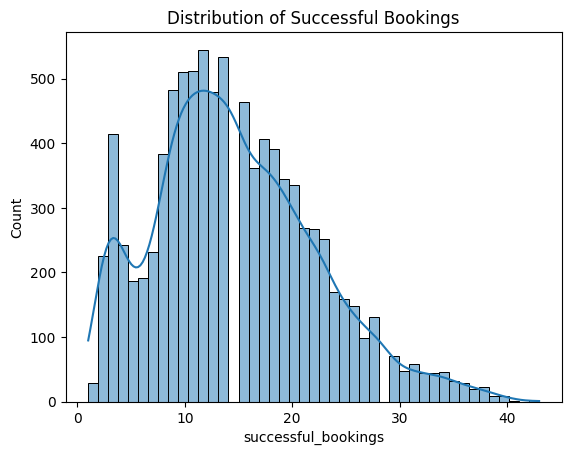

In [30]:
# Distribution of successful bookings
sns.histplot(df['successful_bookings'], kde=True)
plt.title('Distribution of Successful Bookings')
plt.show()

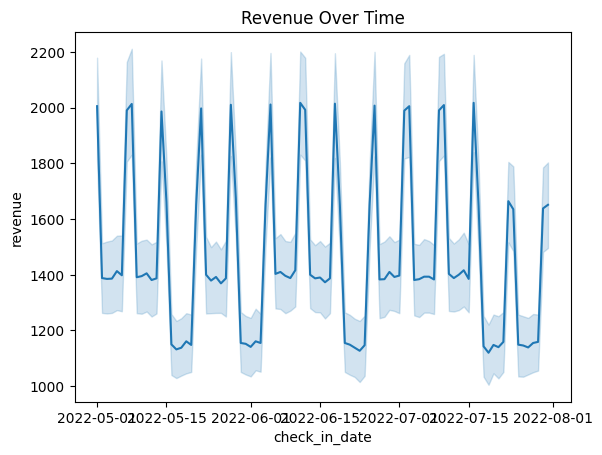

In [31]:
# Revenue analysis
df['revenue'] = df['successful_bookings'] * 100# Assuming a fixed price per booking
sns.lineplot(x='check_in_date', y='revenue', data=df)
plt.title('Revenue Over Time')
plt.show()

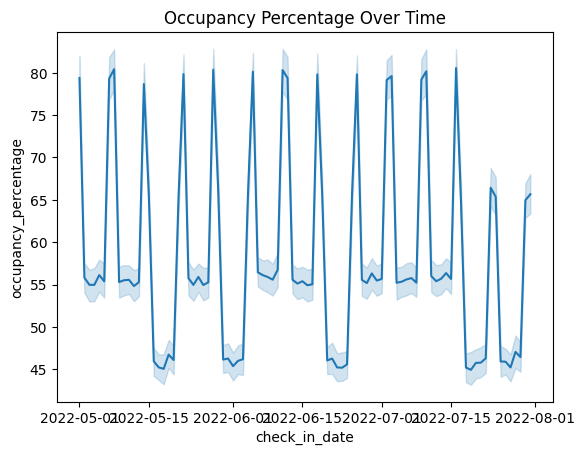

In [32]:
# Occupancy percentage calculation
df['occupancy_percentage'] = (df['successful_bookings'] / df['capacity']) * 100
sns.lineplot(x='check_in_date', y='occupancy_percentage', data=df)
plt.title('Occupancy Percentage Over Time')
plt.show()

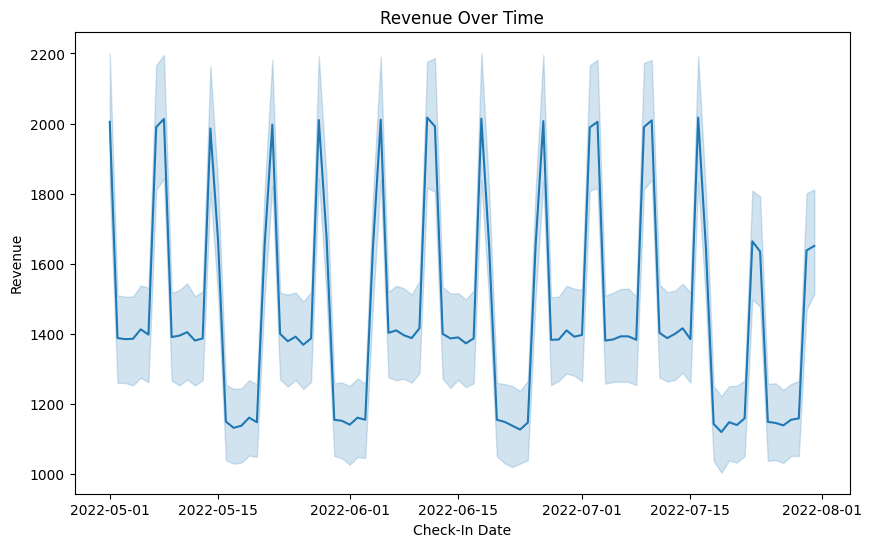

In [40]:
# Revenue over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='check_in_date', y='revenue', data=df)
plt.title('Revenue Over Time')
plt.xlabel('Check-In Date')
plt.ylabel('Revenue')
plt.show()

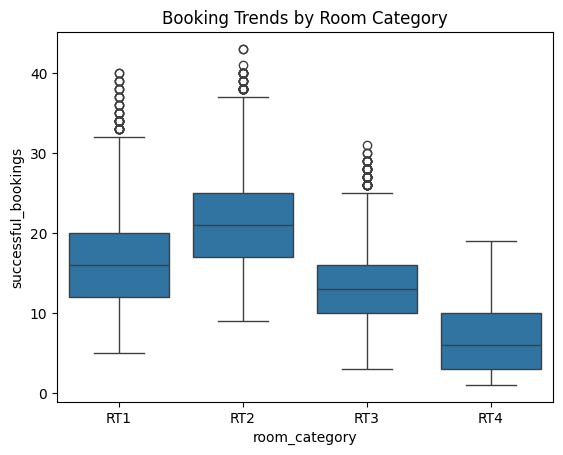

In [33]:
# Booking trends by room category
sns.boxplot(x='room_category', y='successful_bookings', data=df)
plt.title('Booking Trends by Room Category')
plt.show()

## Step 3: Advanced Analysis


In [35]:
# Assuming day types (e.g., weekday/weekend) are based on the check-in date
df['day_of_week'] = df['check_in_date'].dt.day_name()
weekday_map = {
    'Monday': 'Weekday', 'Tuesday': 'Weekday', 'Wednesday': 'Weekday', 
    'Thursday': 'Weekday', 'Friday': 'Weekday', 
    'Saturday': 'Weekend', 'Sunday': 'Weekend'
}
df['day_type'] = df['day_of_week'].map(weekday_map)

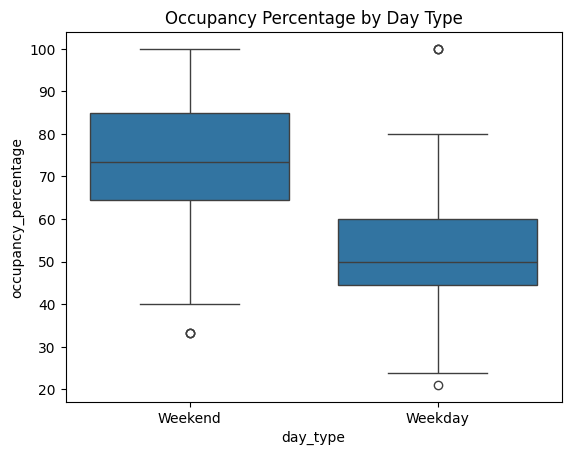

In [36]:
# Occupancy by day type
sns.boxplot(x='day_type', y='occupancy_percentage', data=df)
plt.title('Occupancy Percentage by Day Type')
plt.show()

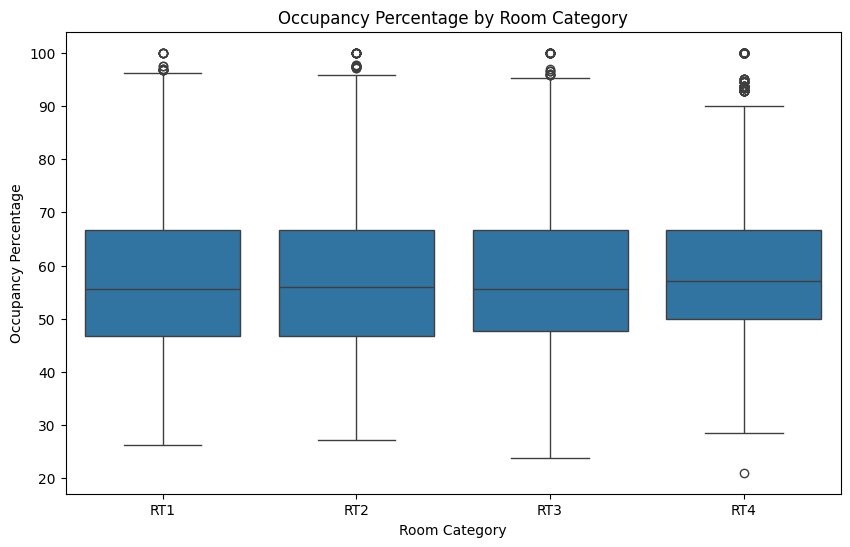

In [39]:
# Occupancy percentage by room category
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_category', y='occupancy_percentage', data=df)
plt.title('Occupancy Percentage by Room Category')
plt.xlabel('Room Category')
plt.ylabel('Occupancy Percentage')
plt.show()

In [42]:
df.to_csv('Report_On_Atliq_Hospitality_Analysis.csv', index=False)